In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [39]:
digits = load_digits()

In [40]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [41]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

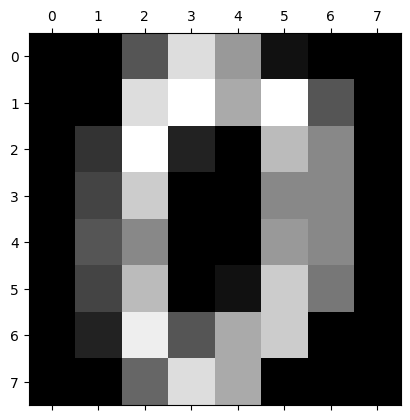

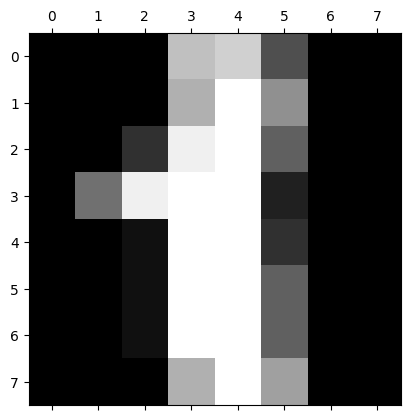

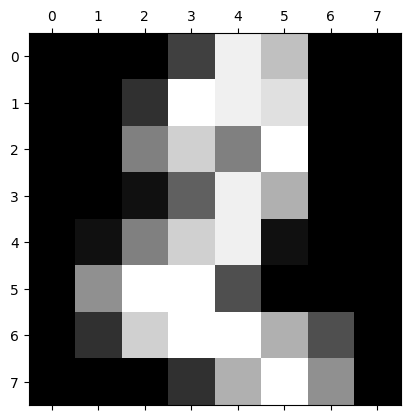

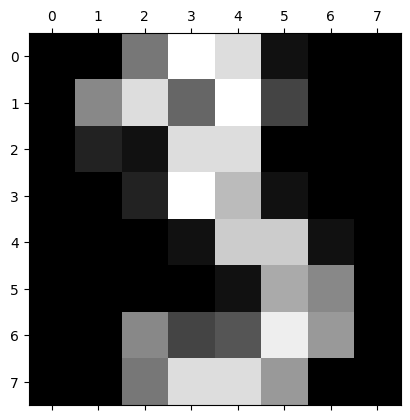

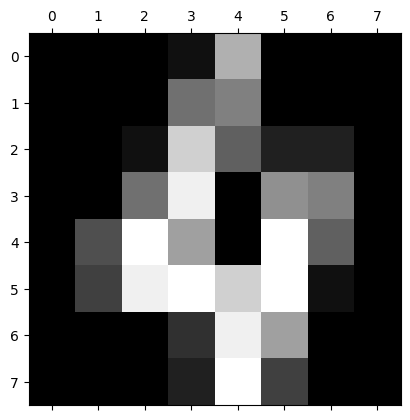

In [42]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [43]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [44]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(digits.images,digits.target, train_size=0.9)

In [45]:
len(X_train)


1617

In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [51]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_train

array([[ 0.,  0.,  7., ...,  4.,  0.,  0.],
       [ 0.,  2., 13., ..., 16., 16.,  3.],
       [ 0.,  0.,  8., ...,  6.,  0.,  0.],
       ...,
       [ 0.,  0.,  2., ..., 16.,  4.,  0.],
       [ 0.,  0.,  6., ..., 16.,  3.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [52]:
y_train = y_train.ravel()
y_train

array([8, 2, 3, ..., 6, 3, 1])

In [54]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [56]:
X_test = X_test.reshape(X_test.shape[0], -1)

In [58]:
model.score(X_test , y_test)

0.9666666666666667

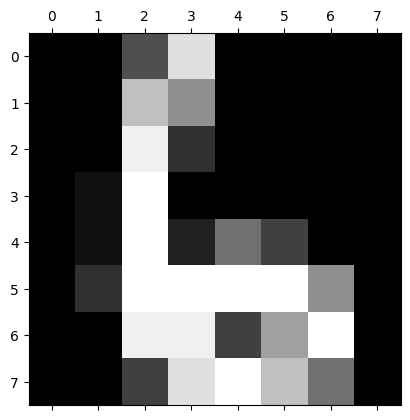

In [59]:
plt.matshow(digits.images[67])

In [60]:
digits.target[67]

np.int64(6)

In [61]:
model.predict([digits.data[67]])

array([6])

In [64]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [66]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_predicted)
cm

array([[15,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 22,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  2, 11,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 20,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 16,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 15,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 19,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 17,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 19,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]])

Text(95.72222222222221, 0.5, 'Truth')

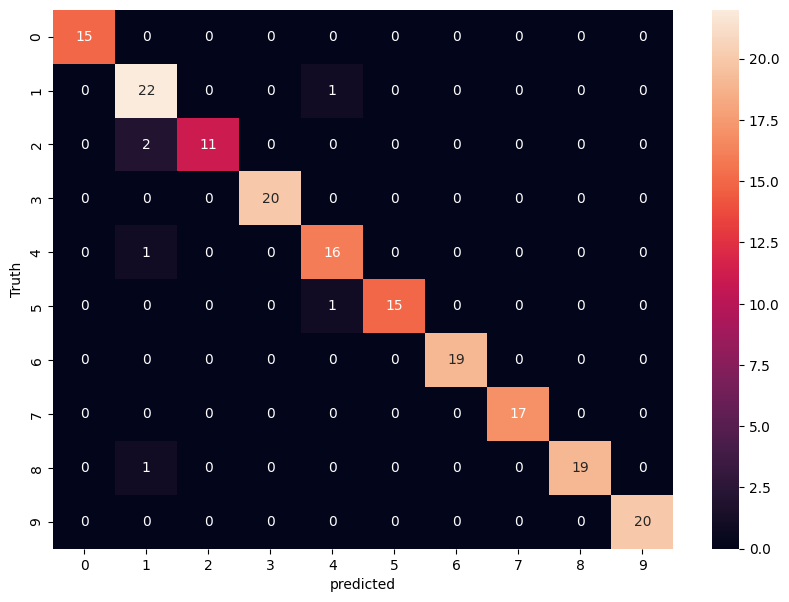

In [68]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')